<a href="https://colab.research.google.com/github/sdsc-bw/feature_engineering/blob/main/notebooks/DataFactory_Demo_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## What is Feature engineering
Conceptually, feature engineering is a process that transforms data into features that can better represent business logic, thereby improving the performance of machine learning.
<img src = '../images/fe_pipeline.png'>
As shown in the figure above, it is an important step in data mining. In fact, it is also the most time-consuming and ignoring step According to <a href = https://whatsthebigdata.com/2016/05/01/data-scientists-spend-most-of-their-time-cleaning-data/> Data Scientists Spend Most of Their Time Cleaning Data </a>.
<img src = '../images/pie.png'>

In [2]:
! git clone https://github.com/sdsc-bw/feature_engineering.git
! ls

Cloning into 'feature_engineering'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 32 (delta 3), reused 32 (delta 3), pack-reused 0
Unpacking objects: 100% (32/32), 952.24 KiB | 2.45 MiB/s, done.
DataFactory_Demo_feature_engineering.ipynb
clustering.ipynb
feature_engineering


## Import Package

In [7]:
root = './feature_engineering/'

In [8]:
#import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(0, root + "codes")
import warnings
warnings.filterwarnings("ignore")


from abc import ABCMeta, abstractmethod
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from typing import cast, Any, Dict, List, Tuple, Optional, Union

from DataFactory import DataFactory
from transforms import UnaryOpt, BinaryOpt, MultiOpt
import transforms as tfd
import logging

In [9]:
1 if 1>0 else -1

1

## Load test dataset: diabetes

<a href = 'https://www.openml.org/d/37'> Diabets</a> is an open source data set on OpenCV. It collected the physical conditions of a total of 768 residents living in Phoenix, Arizona, USA. These information include:
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Has diabet


In [10]:
df = pd.read_csv(root + 'data/dataset_37_diabetes.csv')

In [11]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


We can see that the prediction target is of the character type, which cannot be processed by most models, so we first convert it to a numeric type with labelencoder

In [12]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature engineering
Depending on whether the transformation requires the use of the target value ('class' in the diabetes example), transformations for feature engineering can be distinguished into supervised and unsupervised transformations. And depending on the number of input attributes per conversion unsupervised conversions can again be classified as unary, binary and multivariate conversions.
<img src = '../images/transform.png'>

## Unsupervised Transformation
### Unary Feature transformation

<img width="350" height="360" src = '../images/unary.png'>

In [13]:
class UnaryOpt(metaclass=ABCMeta):
    @abstractmethod
    def fit(self, value: pd.Series) -> pd.Series:
        pass

All unary transform are wrapped as a subclass of 'UnaryOpt', which has one fix function 'fit'. Following is a brief introduction and demonstration of the unary conversion
* abs: |x|
* adde: x + e
* negative: -x
* log: log(x)
* exp: e^x
* reciprocol: 1/x
* square: x*x
* squrt: 
* cos: cos(x)
* sin: sin(x)
* degree: Convert angles from radians to degrees
* radians: Convert angles from degrees to radians
* sigmoid: 1 / (1 + exp(-x))
* tanh: sinh(x)/cosh(x)
* relu: x * (x > 0)
* binning: clustering for a single feature
* ktermfreq: value counts

To simplify the programming, sdsc researchers developed the DataFactory class (the specifics of this class will be described in other notebooks), which can finish all the unary transformation in one function.
- apply_unary_transformations_to_series(self, value: pd.Series) -> pd.DataFrame
    - It takes a series (feature) as input and output a dataframe after the transformation

In [14]:
factory = DataFactory()
tmp_df = factory.apply_unary_transformations_to_series(df['preg'])
tmp_df

2021-07-06 16:06:27,235 - DataFactory - INFO - + Start to apply unary transformtions to series: preg
2021-07-06 16:06:27,237 - DataFactory - INFO -     applying transformation: abs
2021-07-06 16:06:27,239 - DataFactory - INFO -     applying transformation: cos
2021-07-06 16:06:27,241 - DataFactory - INFO -     applying transformation: degree
2021-07-06 16:06:27,242 - DataFactory - INFO -     applying transformation: exp
2021-07-06 16:06:27,244 - DataFactory - INFO -     applying transformation: ln
2021-07-06 16:06:27,246 - DataFactory - INFO -     applying transformation: negative
2021-07-06 16:06:27,249 - DataFactory - INFO -     applying transformation: radian
2021-07-06 16:06:27,252 - DataFactory - INFO -     applying transformation: reciprocal
2021-07-06 16:06:27,255 - DataFactory - INFO -     applying transformation: sin
2021-07-06 16:06:27,258 - DataFactory - INFO -     applying transformation: sigmoid
2021-07-06 16:06:27,275 - DataFactory - INFO -     applying transformation: sq

,abs(preg),cos(preg),degree(preg),exp(preg),log(preg),-(preg),radian(preg),reciprocal(preg),sin(preg),sigmoid(preg),square(preg),tanh(preg),relu(preg),sqrt(preg),binning(preg),kterm(preg)
0,6,0.960170,343.774677,403.428793,1.791759,-6,0.104720,0.166667,-0.279415,0.997527,36,0.999988,6,2.449490,6,0.065104
1,1,0.540302,57.295780,2.718282,0.000000,-1,0.017453,1.000000,0.841471,0.731059,1,0.761594,1,1.000000,0,0.175781
2,8,-0.145500,458.366236,2980.957987,2.079442,-8,0.139626,0.125000,0.989358,0.999665,64,1.000000,8,2.828427,1,0.049479
3,1,0.540302,57.295780,2.718282,0.000000,-1,0.017453,1.000000,0.841471,0.731059,1,0.761594,1,1.000000,0,0.175781
4,0,1.000000,0.000000,1.000000,-inf,0,0.000000,0.000000,0.000000,0.500000,0,0.000000,0,0.000000,4,0.144531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,-0.839072,572.957795,22026.465795,2.302585,-10,0.174533,0.100000,-0.544021,0.999955,100,1.000000,10,3.162278,3,0.031250
764,2,-0.416147,114.591559,7.389056,0.693147,-2,0.034907,0.500000,0.909297,0.880797,4,0.964028,2,1.414214,5,0.134115
765,5,0.283662,286.478898,148.413159,1.609438,-5,0.087266,0.200000,-0.958924,0.993307,25,0.999909,5,2.236068,6,0.074219
766,1,0.540302,57.295780,2.718282,0.000000,-1,0.017453,1.000000,0.841471,0.731059,1,0.761594,1,1.000000,0,0.175781


One noteworthy thing is that feature transformation can lead to the generation of implausible values, such as the fifth value of log(preg) in the table above. Since the original value is 0, the corresponding log value is negative infinity.

The next few plots show the density distribution of the attributes before and after the conversion, and we can see that their density distribution functions show a big difference, and this is the main reason for our conversion

<AxesSubplot:>

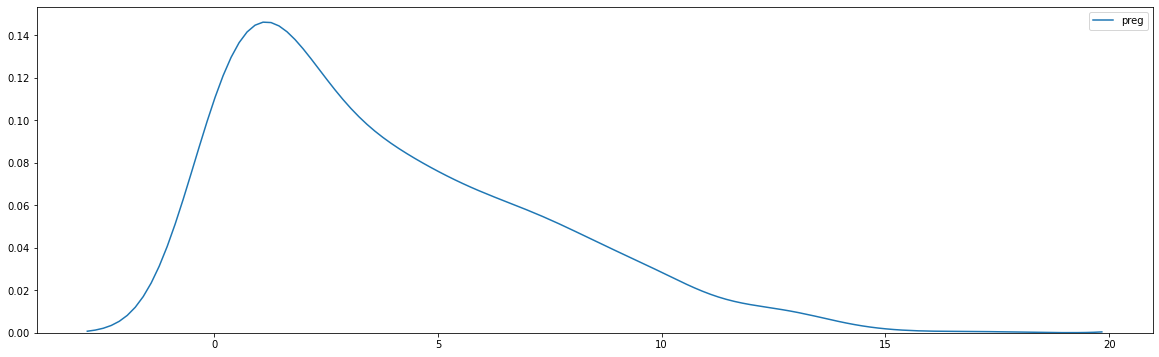

In [15]:
plt.figure(figsize=(20,6))
sns.kdeplot(df['preg'])

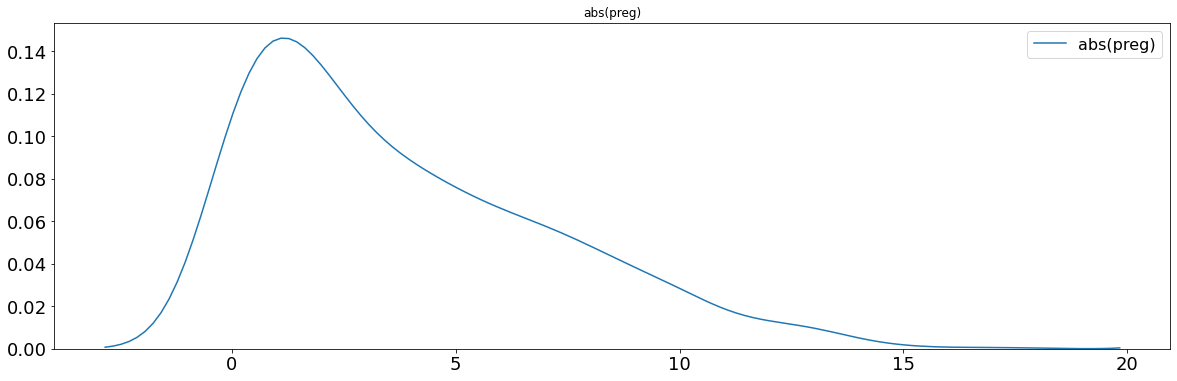

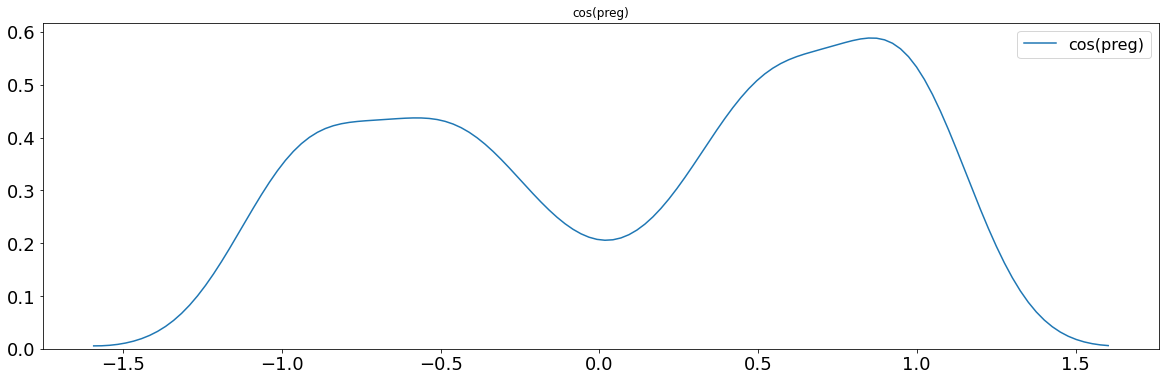

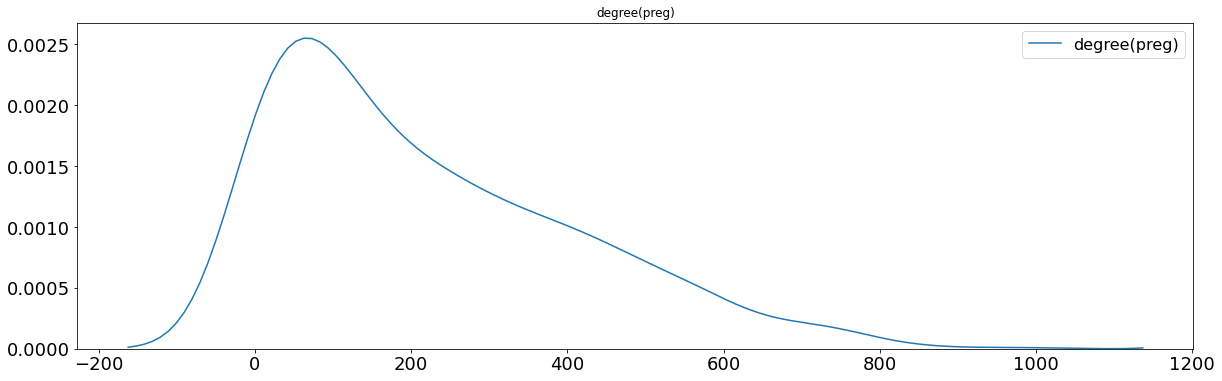

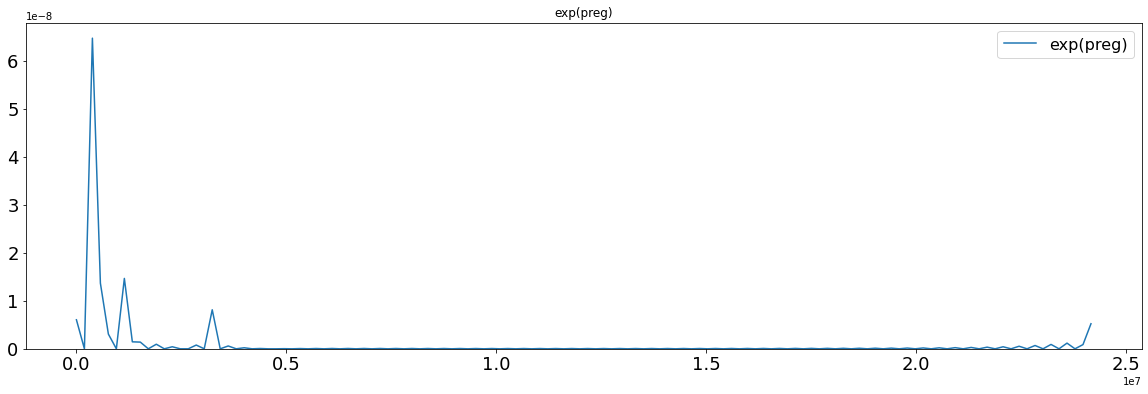

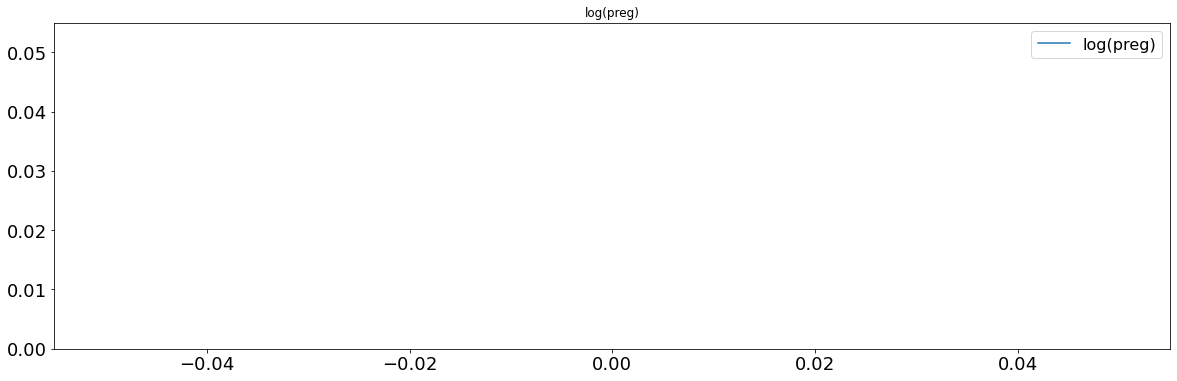

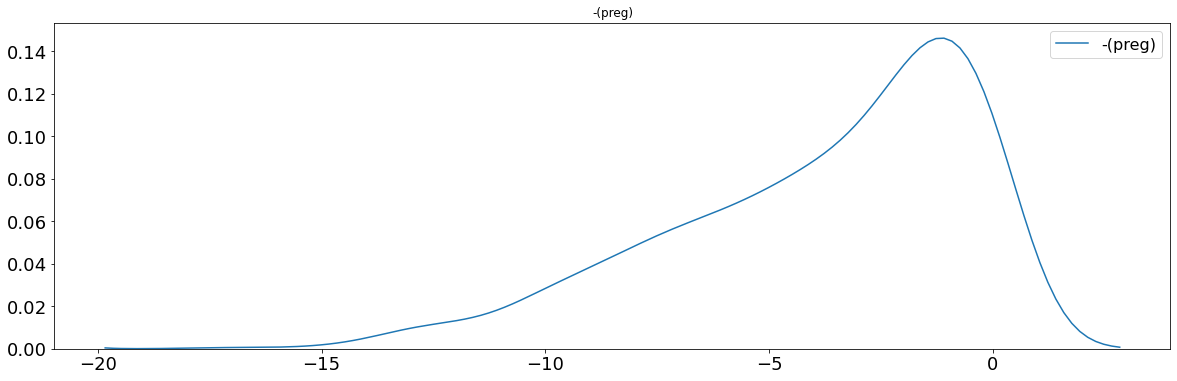

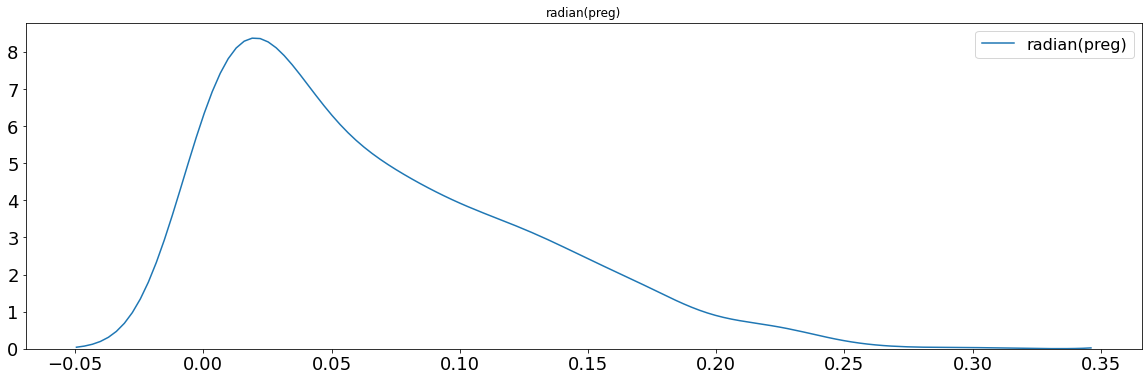

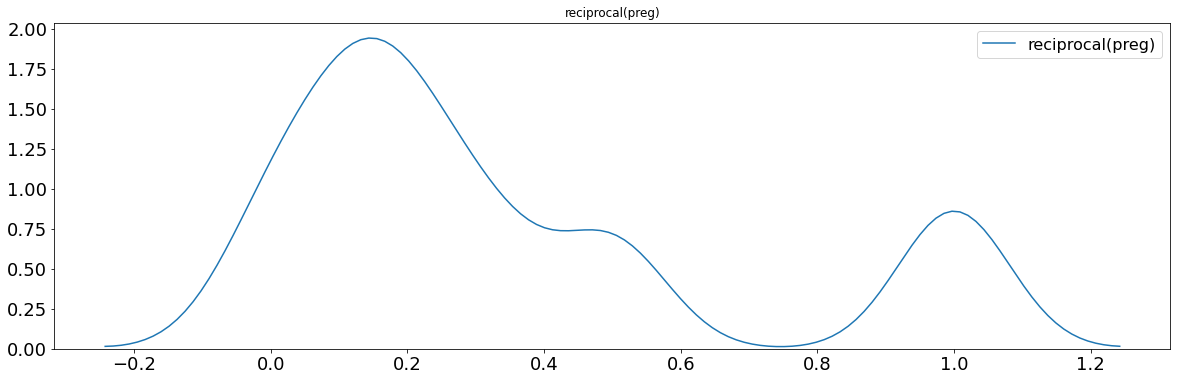

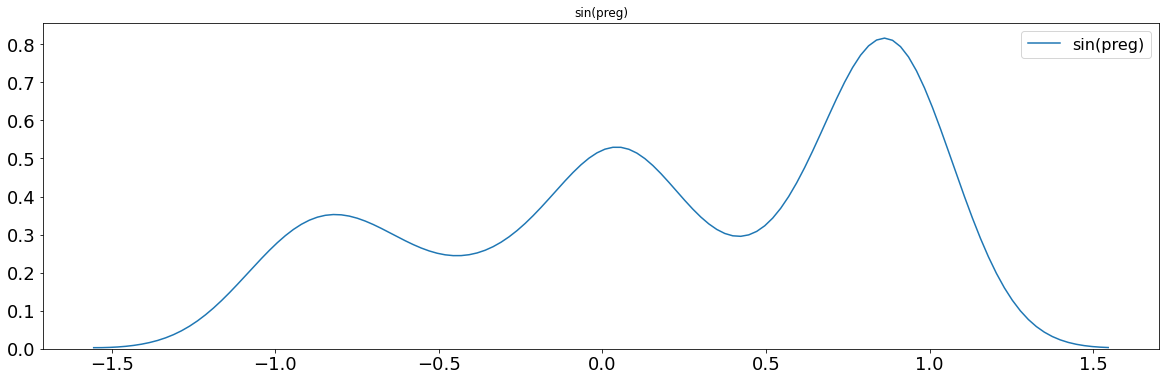

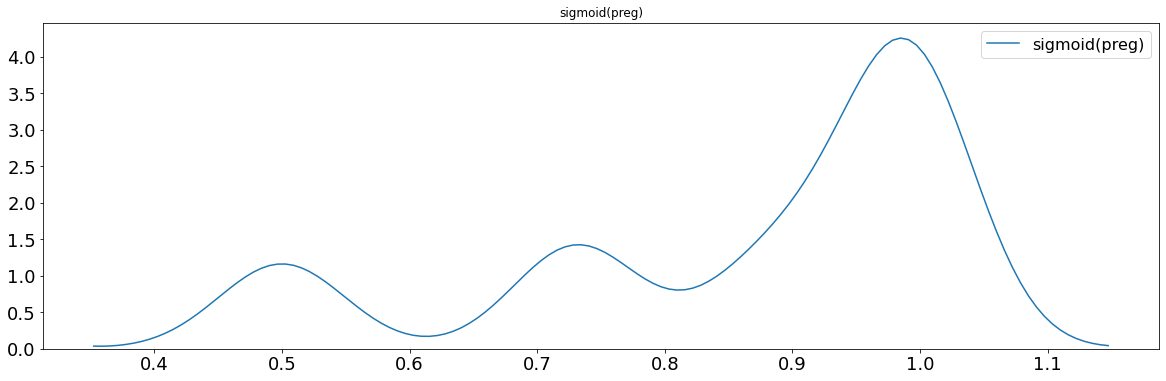

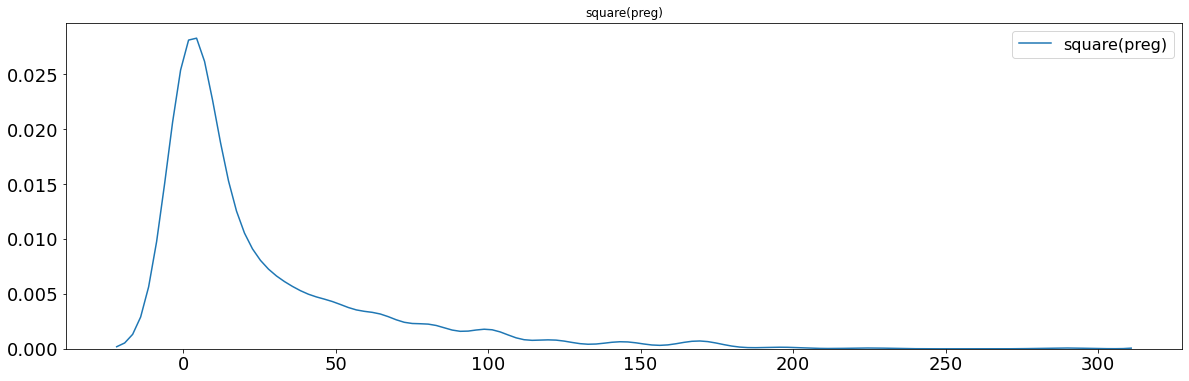

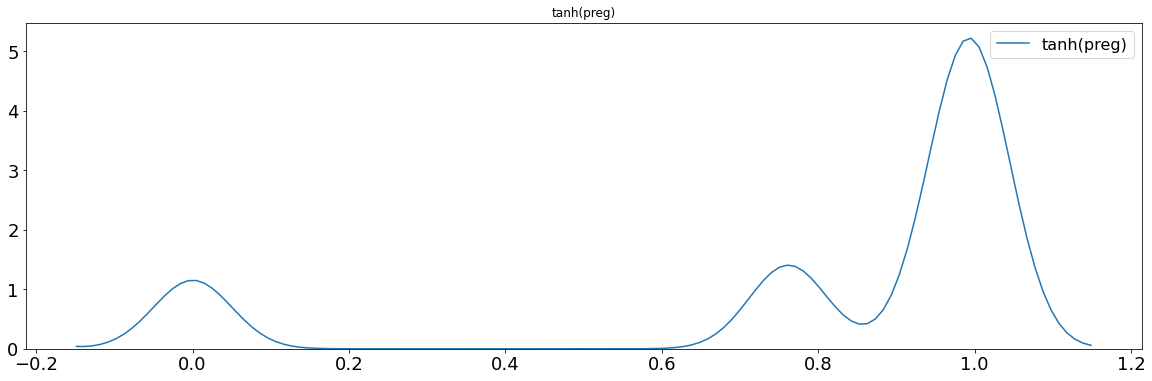

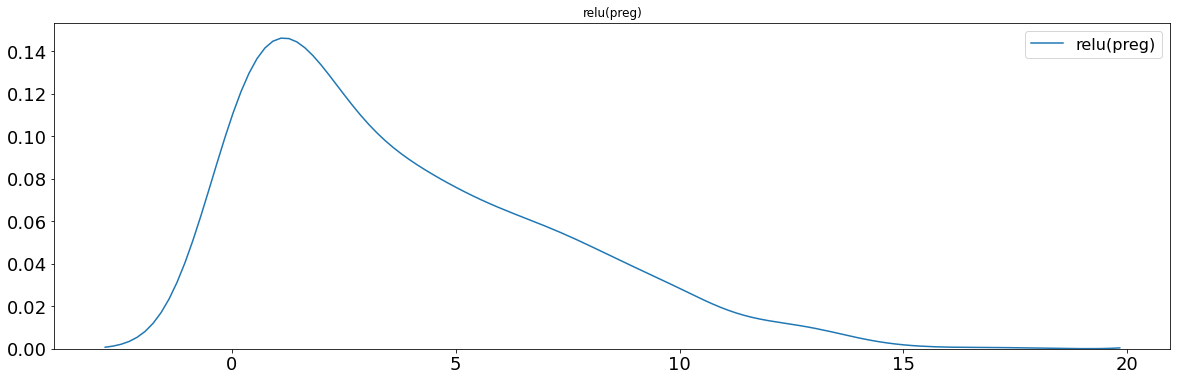

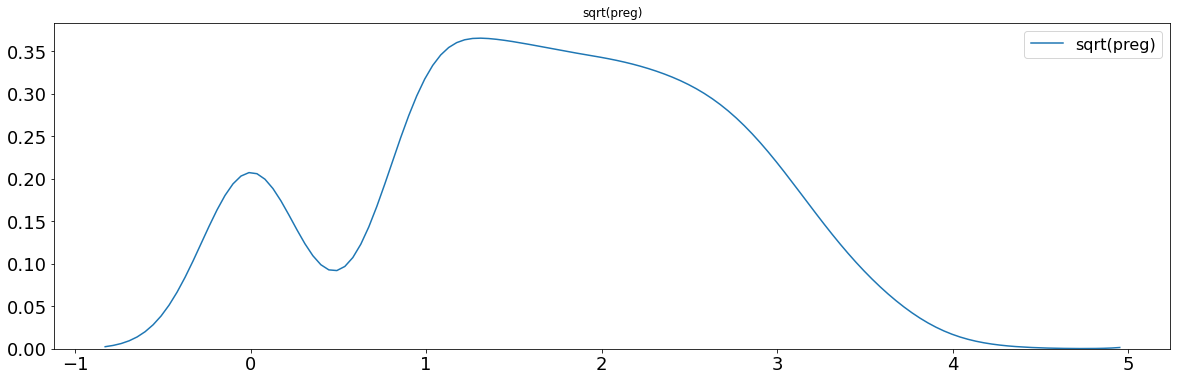

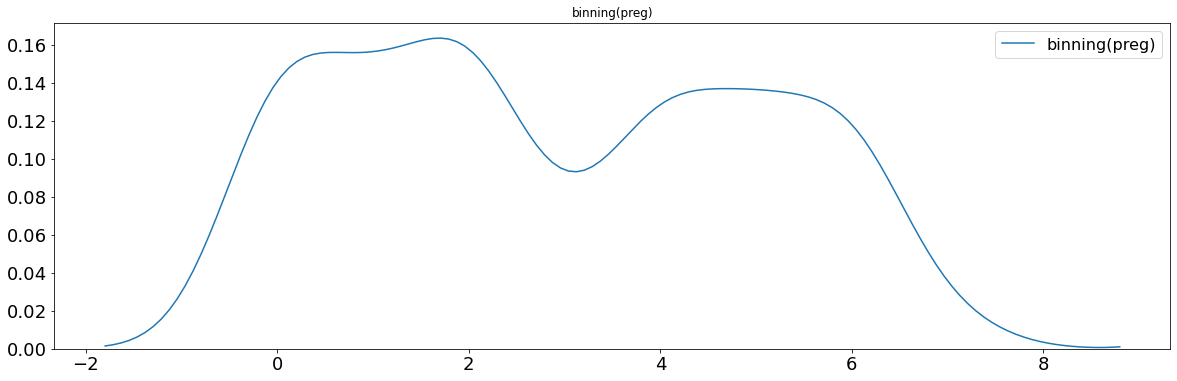

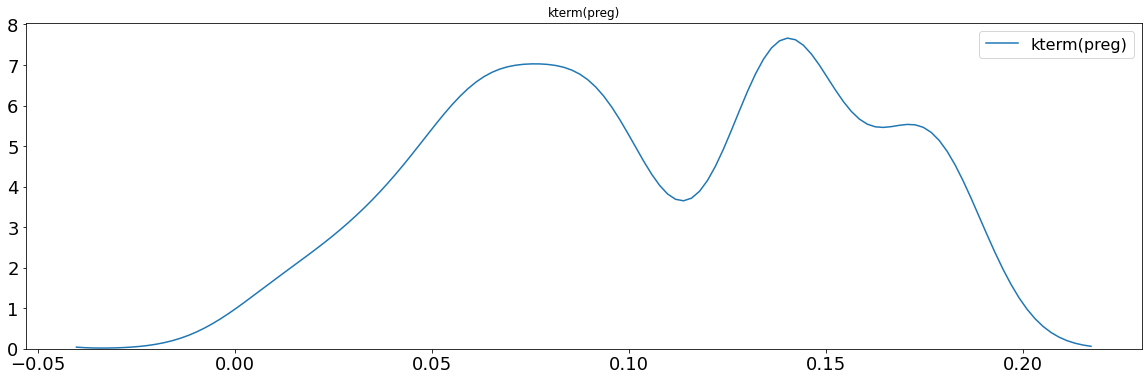

In [16]:
factory.plot_density_for_each_column_in_df(tmp_df)

### Binary feature transformation

<img width="350" height="360" src = '../images/binary.png'>

In [17]:
class BinaryOpt(metaclass=ABCMeta):
    @abstractmethod
    def fit(self, value1: pd.Series, value2: pd.Series) -> pd.Series:
        pass

All unary transform are wrapped as a subclass of 'BinaryOpt', which has one fix function 'fit'. It takes two series as input and output the series after transformation. There are only four binary transformation defiend in DataFactory class.

In [18]:
operators = {'div': tfd.Div(), 'minus': tfd.Minus(), 'add': tfd.Add(), 'product': tfd.Product()}

In [19]:
factory = DataFactory()
tmp_df = factory.apply_binary_transformations_for_series(df['preg'], df['plas'])
tmp_df

2021-07-06 16:06:40,257 - DataFactory - INFO - + Start to apply binary transformtions to series preg and series plas
2021-07-06 16:06:40,258 - DataFactory - INFO -     applying transformation: div
2021-07-06 16:06:40,260 - DataFactory - INFO -     applying transformation: minus
2021-07-06 16:06:40,262 - DataFactory - INFO -     applying transformation: add
2021-07-06 16:06:40,265 - DataFactory - INFO -     applying transformation: product
2021-07-06 16:06:40,268 - DataFactory - INFO - - Finish transformation


,preg/plas,preg-plas,preg+plas,preg*plas
0,0.040541,-142,154,888
1,0.011765,-84,86,85
2,0.043716,-175,191,1464
3,0.011236,-88,90,89
4,0.000000,-137,137,0
...,...,...,...,...
763,0.099010,-91,111,1010
764,0.016393,-120,124,244
765,0.041322,-116,126,605
766,0.007937,-125,127,126


### Multiple feature transformation

<img width="650" height="660" src = '../images/multiple.png'>

All unary transform are wrapped as a subclass of 'MultiOpt', which also has one fix function 'fit'. The multivariate transformation takes several different features as input (generally the whole dataset) and its output generally contains one or more different features in form of DataFrame. The transformation functions can be broadly classified into clustering, regularization, downscaling and time series attribute extraction. At present, SDSC researchers do not implement all possible transformation methods, for example, for the clustering method category only Kmeans is implemented, while other common clusters are not implemented.

- Clustering: 
    - clustering the data set with Kmeans and use the result as new feature.
    - Because most, datasets contain dozens of features, and kmeans does not perform well on high-dimensional data, SDSC staff incorporates a sliding window mechanism in clustering, where values are clustered only for features in the same window.
- Normalization:
    - minmax 
    - zscore
- Dimension_reduction:
    - isomap
- Time_series feature extraction: each item in the dataset is treated as a time series
    - Diff: diff between the columns
    - WinAgg
        - apply sliding window to it and aggregate
        - agg func include: max, .25, .50, .75, max, std
- Other:
    - LeakyInfo
    - KernelApproxRBF: use rbf to approximate kernel


In [20]:
class MultiOpt(metaclass=ABCMeta):
    @abstractmethod
    def fit(self, df: pd.DataFrame):
        pass

In [21]:
factory = DataFactory()
tmp_df = factory.apply_multiple_transformations_for_dataframe(df.iloc[:, :-1])
tmp_df

2021-07-06 16:06:46,516 - DataFactory - INFO - + Start to apply multi transformtions to dataframe
2021-07-06 16:06:46,518 - DataFactory - INFO -     applying transformation: clustering
2021-07-06 16:06:46,891 - DataFactory - INFO -     applying transformation: diff
2021-07-06 16:06:46,893 - DataFactory - INFO -     applying transformation: mmnorm
2021-07-06 16:06:46,897 - DataFactory - INFO -     applying transformation: Winagg
2021-07-06 16:06:48,008 - DataFactory - INFO -     applying transformation: zscore
2021-07-06 16:06:48,017 - DataFactory - INFO -     applying transformation: nominalExpansion
2021-07-06 16:06:48,038 - DataFactory - INFO -     applying transformation: isomap
2021-07-06 16:06:48,537 - DataFactory - INFO -     applying transformation: leakyInfo
2021-07-06 16:06:48,944 - DataFactory - INFO -     applying transformation: kernelapproxrbf
2021-07-06 16:06:48,948 - DataFactory - INFO - - Finish transformation


,Clustering_pppsimpa,Clustering_pppsimpa,diff_preg,diff_plas,diff_pres,diff_skin,diff_insu,diff_mass,diff_pedi,diff_age,...,pedi_leaky,age_leaky,preg_rbfFeature,plas_rbfFeature,pres_rbfFeature,skin_rbfFeature,insu_rbfFeature,mass_rbfFeature,pedi_rbfFeature,age_rbfFeature
0,0,4,NaN,142.0,-76.0,-37.0,-35.0,NaN,-32.973,50.0,...,-0.218900,-15.499142,0.030664,0.147350,0.498630,-0.498452,-0.311379,0.167472,0.484564,0.346811
1,5,4,NaN,84.0,-19.0,-37.0,-29.0,NaN,-26.249,31.0,...,-0.007662,-3.312309,-0.190102,0.488185,-0.484598,0.205752,-0.479631,-0.451984,0.478402,-0.479665
2,0,2,NaN,175.0,-119.0,-64.0,0.0,NaN,-22.628,32.0,...,-0.306291,5.559581,0.093108,0.248288,0.492616,0.069022,-0.015274,-0.084511,-0.470237,-0.443825
3,2,0,NaN,88.0,-23.0,-43.0,71.0,NaN,-27.933,-73.0,...,0.263619,3.350916,-0.025390,-0.265142,-0.499987,0.077623,-0.187867,-0.431974,-0.159355,0.215132
4,4,1,NaN,137.0,-97.0,-5.0,133.0,NaN,-40.812,-135.0,...,-1.706797,-4.809648,0.320401,-0.470322,-0.467273,-0.417853,0.348960,-0.460105,0.160281,-0.421863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,4,1,NaN,91.0,-25.0,-28.0,132.0,NaN,-32.729,-117.0,...,0.410129,-34.770189,-0.453741,-0.213958,0.267825,0.418787,-0.293690,-0.344215,0.494585,-0.265149
764,5,4,NaN,120.0,-52.0,-43.0,-27.0,NaN,-36.460,27.0,...,0.015265,4.767827,0.054320,0.475294,-0.217993,-0.019723,0.226924,0.314969,-0.166132,-0.026911
765,2,7,NaN,116.0,-49.0,-49.0,89.0,NaN,-25.955,-82.0,...,0.159100,-2.113720,0.329096,0.306748,0.430575,-0.467913,0.250398,-0.307603,-0.268878,-0.267246
766,5,2,NaN,125.0,-66.0,-60.0,0.0,NaN,-29.751,47.0,...,0.003919,-15.221553,-0.343536,0.486780,0.304388,0.499990,0.073474,0.412834,-0.488131,0.021913


## Supervised Transformation

This category is more complex and it mainly uses some existing models, such as decision trees, k-nearest neighbors, etc., to assist in generating new features. Depending on the type of dataset, it can be broadly classified into two main types: classification and regression.

Another special feature of this classification is that since the target value of the test set is unknown, there is no way to generate new features purely by relying on the test set. The composition of the features in the test set depends on the model built in the training set.

Taking DecisionTreeClassifier for example, following three information can be extracted:
- regard each node in the last layer of the tree as a cluster, extract the clustering information
- use the prediction of the model
- compute the distance between the predictt and ground_truth

In [22]:
factory = DataFactory()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1])
tmp_df, tmp_df2 = factory.apply_supervised_transformations_for_dataframe(X_train, X_test, y_train, y_test, 'C')
tmp_df

2021-07-06 16:06:51,304 - DataFactory - INFO - + Start to apply supervised transformtions to dataframe
2021-07-06 16:06:51,307 - DataFactory - INFO -     applying transformation: decisionTreeClassifierTransform
2021-07-06 16:06:51,432 - DataFactory - INFO -     applying transformation: mlpClassifierTransform
2021-07-06 16:06:55,402 - DataFactory - INFO -     applying transformation: nearestNeighborsClassifierTransform
2021-07-06 16:06:57,726 - DataFactory - INFO -     applying transformation: svcTransform
2021-07-06 16:06:57,818 - DataFactory - INFO -     applying transformation: gauDotClassifierTransform
2021-07-06 16:07:02,061 - DataFactory - INFO -     applying transformation: gauExpClassifierTransform
2021-07-06 16:07:07,955 - DataFactory - INFO -     applying transformation: gauRBFClassifierTransform
2021-07-06 16:07:13,990 - DataFactory - INFO -     applying transformation: randomForestClassifierTransform
2021-07-06 16:07:14,237 - DataFactory - INFO -     applying transformation:

,dt_cla_cluster,dt_cla_pred,mlp_pred_0_8,mlp_pred_1_8,mlp_pred_2_8,mlp_pred_3_8,mlp_pred_4_8,mlp_pred_5_8,mlp_pred_6_8,mlp_pred_7_8,...,pedi,age,preg,plas,pres,skin,insu,mass,pedi,age
263,6,0,0.000000,0.0,0.000000,9.105838,11.428781,1.151992,3.955892,3.889595,...,0.200,63,3,142,80,15,0,32.4,0.200,63
193,6,1,8.854547,0.0,0.000000,7.454682,14.089636,0.000000,5.440111,8.391684,...,0.578,40,11,135,0,0,0,52.3,0.578,40
313,0,0,0.000000,0.0,0.000000,10.270849,2.229790,0.000000,0.000000,9.213902,...,0.626,25,3,113,50,10,85,29.5,0.626,25
117,1,0,1.858985,0.0,0.000000,7.928876,6.814543,0.000000,5.544470,1.296962,...,0.654,25,5,78,48,0,0,33.7,0.654,25
602,3,0,0.000000,0.0,0.000000,8.664744,14.513915,1.341577,4.834008,3.621374,...,0.100,30,1,124,74,36,0,27.8,0.100,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,6,0,3.711746,0.0,0.000000,12.418943,12.687165,0.000000,4.996213,1.833597,...,0.252,30,4,137,84,0,0,31.2,0.252,30
122,1,0,0.000000,0.0,2.655032,16.286547,2.034009,3.624053,0.000000,6.408585,...,0.404,23,2,107,74,30,100,33.6,0.404,23
679,0,0,0.000000,0.0,0.000000,26.264194,0.000000,0.000000,0.000000,19.555958,...,0.614,23,2,101,58,17,265,24.2,0.614,23
545,7,1,0.000000,0.0,0.000000,24.541624,0.000000,0.000000,0.000000,17.445887,...,0.423,37,8,186,90,35,225,34.5,0.423,37


In [23]:
factory = DataFactory()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1])
tmp_df, tmp_df2 = factory.apply_supervised_transformations_for_dataframe(X_train, X_test, y_train, y_test, 'R')
tmp_df

2021-07-06 16:07:14,410 - DataFactory - INFO - + Start to apply supervised transformtions to dataframe
2021-07-06 16:07:14,411 - DataFactory - INFO -     applying transformation: decisionTreeRegressorTransform
2021-07-06 16:07:14,556 - DataFactory - INFO -     applying transformation: linearRegressorTransform
2021-07-06 16:07:14,592 - DataFactory - INFO -     applying transformation: mlpRegressorTransform
2021-07-06 16:07:17,153 - DataFactory - INFO -     applying transformation: nearestNeighborsRegressorTransform
2021-07-06 16:07:17,726 - DataFactory - INFO -     applying transformation: svrTransform
2021-07-06 16:07:17,842 - DataFactory - INFO -     applying transformation: gauDotWhiteRegressorTransform
2021-07-06 16:07:19,574 - DataFactory - INFO -     applying transformation: gauExpRegressorTransform
2021-07-06 16:07:21,211 - DataFactory - INFO -     applying transformation: gauRBFRegressorTransform
2021-07-06 16:07:23,122 - DataFactory - INFO -     applying transformation: randomF

,preg,plas,pres,skin,insu,mass,pedi,age,linear_pred,linear_pred_diff,...,insu,mass,pedi,age,gaurbf_reg_pred,gaurbf_reg_pred_diff,rfr_pred,rfr_pred_diff,xgb_reg_pred227,xgb_reg_pred_diff227
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0.701011,4.700773e-16,...,0.0,33.6,0.627,50.0,1.000000e+00,1.185540e-10,0.98,0.0222,1.001062,-0.000766
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,-0.031106,5.526956e-17,...,94.0,28.1,0.167,21.0,-3.768531e-12,1.949667e-11,0.00,-0.0053,0.000491,-0.000563
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0.889501,-5.518779e-16,...,168.0,43.1,2.288,33.0,1.000000e+00,1.148062e-10,0.87,0.0999,1.001874,-0.001915
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,0.059599,2.432392e-16,...,88.0,31.0,0.248,26.0,1.000000e+00,1.729875e-11,0.66,0.2365,0.987153,0.011964
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.521611,2.394275e-16,...,0.0,35.3,0.134,29.0,3.889113e-11,4.095041e-11,0.23,-0.0883,0.002195,-0.002089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.091749,3.377509e-16,...,0.0,22.5,0.142,33.0,6.397157e-11,2.903827e-12,0.05,-0.0445,0.000711,-0.000883
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.441147,1.157271e-16,...,180.0,32.9,0.171,63.0,5.074944e-14,9.982987e-11,0.16,-0.1256,0.000301,0.000408
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.227920,-1.446785e-16,...,112.0,26.2,0.245,30.0,4.939091e-11,6.870624e-11,0.11,-0.0731,0.005226,-0.004536
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,0.402251,3.561951e-16,...,0.0,30.1,0.349,47.0,1.000000e+00,6.429477e-11,0.87,0.1013,1.002115,-0.002951


# Evaluate
In this section we will briefly test the effect of the feature engineering by comparing the accuracy before and after using the transformation.

Meanwhile, SDSC engineers have integrated the evaluate method in the data factory. This method uses the data and the predicted target as input and outputs the corresponding cv results: weighted f1 score for classification task and 1-rae for regression task.

It is worth noting that we only use multivariate transformation once in this test. In addition, there may generate na or inf values after transformation, which we will handle using the clean_data method in the data factory.

In [24]:
factory = DataFactory()
factory.evaluate(df.iloc[:, :-1], df.iloc[:, -1])

(0.747962738853802, 0.030806371475221358)

In [25]:
tmp_multi = factory.apply_multiple_transformations_for_dataframe((df.iloc[:, :-1]))

2021-07-06 16:07:33,390 - DataFactory - INFO - + Start to apply multi transformtions to dataframe
2021-07-06 16:07:33,397 - DataFactory - INFO -     applying transformation: clustering
2021-07-06 16:07:33,630 - DataFactory - INFO -     applying transformation: diff
2021-07-06 16:07:33,632 - DataFactory - INFO -     applying transformation: mmnorm
2021-07-06 16:07:33,637 - DataFactory - INFO -     applying transformation: Winagg
2021-07-06 16:07:34,359 - DataFactory - INFO -     applying transformation: zscore
2021-07-06 16:07:34,364 - DataFactory - INFO -     applying transformation: nominalExpansion
2021-07-06 16:07:34,376 - DataFactory - INFO -     applying transformation: isomap
2021-07-06 16:07:34,694 - DataFactory - INFO -     applying transformation: leakyInfo
2021-07-06 16:07:35,010 - DataFactory - INFO -     applying transformation: kernelapproxrbf
2021-07-06 16:07:35,016 - DataFactory - INFO - - Finish transformation


In [26]:
df = pd.concat([tmp_multi, df], axis = 1)

In [27]:
df = factory.clean_dat(df)

2021-07-06 16:07:35,169 - DataFactory - INFO - + Start to clean the given dataframe
2021-07-06 16:07:35,206 - DataFactory - INFO -     number of inf and nan are for dataset: (0, 1536)
2021-07-06 16:07:35,225 - DataFactory - INFO -     set type to float32 at first && deal with inf.
2021-07-06 16:07:35,236 - DataFactory - INFO -     remove columns with half of nan
2021-07-06 16:07:35,376 - DataFactory - INFO - - Finish with Data cleaning, number of inf and nan are for dataset: (0, 0)


In [29]:
factory.evaluate(df.iloc[:, :-1], df.iloc[:, -1])

(0.7619731422907146, 0.037881990905627626)

By comparing the results we find that there is a significant improvement